# 5章　誤差逆伝播法

ニューラルネットワークの学習では重みパラメータの勾配(重みパラメータに関する損失関数の勾配)は数値微分によって求めていた。これは実装は簡単だが、計算に時間がかかる。そこで効率よく勾配計算を行なうために「誤差逆伝播法」を用いる。
ここでは数式ではなく、「計算グラフ(computational graph)」を用いて理解を深める。

## 5.1 計算グラフ

計算グラフは計算の過程をグラフにしたものである。

### 5.1.1 計算グラフで解く
問1　1個100円の林檎を2個買った際に支払う金額を求める。消費税は10%とする。


/Users/smap3/PycharmProjects/exercise_of_deep_larning_from_scratch/env/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


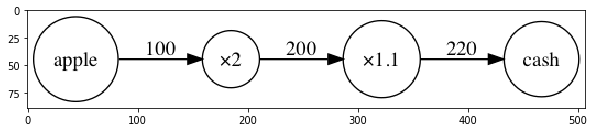

In [9]:
import matplotlib.pyplot as plt
from graphviz import Digraph
from matplotlib.image import imread

f = Digraph(format="png")
f.attr(rankdir='LR', size='8,5')

f.attr('node', shape='circle')
f.edge('apple', '×2', label='100')
f.edge('×2', '×1.1', label='200')
f.edge('×1.1', 'cash', label='220')

f.render("../docs/5_1_1")

img = imread('../docs/5_1_1.png')
plt.figure(figsize=(10,8))
plt.imshow(img)

plt.show()

/Users/smap3/PycharmProjects/exercise_of_deep_larning_from_scratch/env/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


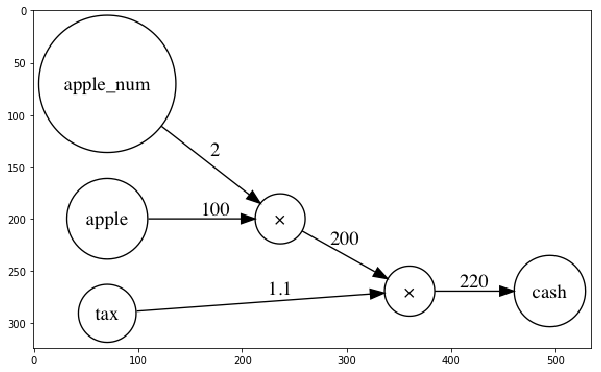

In [10]:
f = Digraph(format="png")
f.attr(rankdir='LR', size='8,5')

f.attr('node', shape='circle')

f.node('apple', 'apple')
f.node('apple_num', 'apple_num')
f.node('tax', 'tax')
f.node('mul1', '×')
f.node('mul2', '×')
f.node('cash', 'cash')

f.body.append('{rank=same; apple; apple_num; tax;}')

f.edge('apple', 'mul1', label='100')
f.edge('apple_num', 'mul1', label='2')
f.edge('mul1', 'mul2', label='200')
f.edge('tax', 'mul2', label='1.1')
f.edge('mul2', 'cash', label='220')


f.render("../docs/5_1_1")

img = imread('../docs/5_1_1.png')
plt.figure(figsize=(10,8))
plt.imshow(img)

plt.show()

グラフの左から右へ計算を進めることを「順伝播(forward propergation)」という。逆に右から左に計算を遡ることを「逆伝播(backward propergation)」という。

### 5.1.2 局所的な計算
各ノードにおける計算は局所的なものであり、それ以前の計算されてくる過程は考慮する必要なく計算が行なうことが出来る。

### 5.1.3 なぜ計算グラフで解くのか？
計算グラフで解く利点
* 各ノードでは局所的な計算でよい
* 途中の計算の結果を全て保持することができる
* 玉方向の伝播によって「微分」を効率よく計算できる点

りんごの値段が少し上がった場合に総支払額が同変化するか確認することが出来る。

## 5.2 連鎖律
局所的な微分を伝達する原理は、「連鎖律(chain rule)」によるものである。

### 5.2.1 計算グラフの逆伝播
逆伝播の計算手順は信号$E$に対して、ノードの局所的な微分$\frac{\delta y}{\delta x}$を乗算し次のノードへ伝達していく。


/Users/smap3/PycharmProjects/exercise_of_deep_larning_from_scratch/env/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


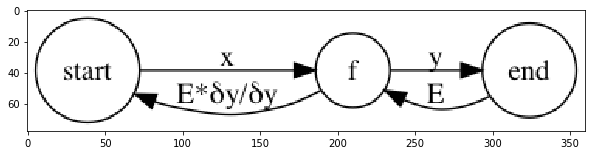

In [11]:
import matplotlib.pyplot as plt
from graphviz import Digraph
from matplotlib.image import imread

f = Digraph(format="png")
f.attr(rankdir='LR', size='8,5')

f.attr('node', shape='circle')
f.edge('start', 'f', label='x')
f.edge('f', 'start', label='E*δy/δy')
f.edge('f', 'end', label='y')
f.edge('end', 'f', label='E')

f.render("../docs/5_2_1")

img = imread('../docs/5_2_1.png')
plt.figure(figsize=(10,8))
plt.imshow(img)

plt.show()

### 5.2.2 連鎖律とは

* 合成関数とは  
複数の関数によって構成される関数。
$z=(x+y)^{2}$という式は以下2式のように構成される。

$$
z=t^{2} \\
t=x+y
$$

連鎖律は合成関数の微分についての性質である。
> 合成関数の微分は、合成関数を構成するそれぞれの関数の微分の積によって表すことが出来る

上記例でいうと以下の様に表すことが出来る。
$$\frac{\delta z}{\delta x}=
\frac{\delta z}{\delta t}\frac{\delta t}{\delta x}$$

計算を進めると以下となり、連鎖律をもちいて合成関数の微分が行える。

$$
\frac{\delta z}{\delta t} = 2t \\
\frac{\delta t}{\delta x} = 1 \\
\frac{\delta z}{\delta x}=
\frac{\delta z}{\delta t}\frac{\delta t}{\delta x} = 2t・1 = 2(x + y)
$$


### 5.2.3 連鎖律と計算グラフ

計算グラフの逆伝播を考えた場合、連鎖律を用いて微分を求めることが出来る。

$$
\frac{\delta z}{\delta z}\frac{\delta z}{\delta t}\frac{\delta t}{\delta x} \\
=\frac{\delta z}{\delta t}\frac{\delta t}{\delta x} \\
=\frac{\delta z}{\delta x} \\
$$


## 5.3 逆伝播
加算や乗算を例に逆伝播の仕組みを考える。

### 5.3.1 加算ノードの逆伝播

$z=x+y$について逆伝播を考える。この式について微分を行なうと以下となる。
$$
\frac{\delta z}{\delta x}=1 \\
\frac{\delta z}{\delta y}=1 \\
$$

逆伝播の際には、前の計算から伝わってきた$\frac{\delta L}{\delta z}$を乗算して次のノードに渡す。(この場合はx,yの微分とも1なので$\frac{\delta L}{\delta z}・1$となる)



### 5.3.2 乗算ノードの逆伝播

$z=xy$について逆伝播を考える。この式について微分を行なうと以下となる。
$$
\frac{\delta z}{\delta x}=y \\
\frac{\delta z}{\delta y}=x \\
$$

乗算の逆伝播では入力した値をひっくり返した値が用いられることとなる。
$$
xの逆伝播：\frac{\delta L}{\delta z}\frac{\delta z}{\delta x} = \frac{\delta L}{\delta z}・y\\
yの逆伝播：\frac{\delta L}{\delta z}\frac{\delta z}{\delta y} = \frac{\delta L}{\delta z}・x \\
$$

加算の逆伝播では上流の値をただ流すだけ立ったので順伝播の入力信号は不要だったが、乗算の逆伝播では順伝播の入力信号を保持しておかなければならない。

### 5.3.3 リンゴの例

割愛



## 5.4 単純なレイヤの実装

計算グラフ乗算ノードを「乗算レイヤ(MulLayer)」、加算ノードを「加算レイヤ(AddLayer)」という名前で実装する。

### 5.4.1 乗算レイヤの実装
レイヤはforward()とbackward()の共通のインタフェースを持つようにする。


In [12]:
class MulLayer:
    def __init__(self):
        self.x = None
        self.y = None

    def forward(self, x, y):
        self.x = x
        self.y = y                
        out = x * y

        return out

    def backward(self, dout):
        # ひっくり返した値を乗算して返す
        dx = dout * self.y
        dy = dout * self.x

        return dx, dy

In [13]:
# リンゴ2個と消費税を計算する実装
apple = 100
apple_num = 2
tax = 1.1

# layer
mul_apple_layer = MulLayer()
mul_tax_layer = MulLayer()

# forward
apple_price = mul_apple_layer.forward(apple, apple_num)
price = mul_tax_layer.forward(apple_price, tax)

print(price)

# 各変数に関する微分
dprice = 1

dapple_price, dtax = mul_tax_layer.backward(dprice)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)

print(dapple, dapple_num, dtax)

220.00000000000003
2.2 110.00000000000001 200


In [14]:
# 加算レイヤ
class AddLayer:
    def __init__(self):
        pass

    def forward(self, x, y):
        out = x + y

        return out

    def backward(self, dout):
        dx = dout * 1
        dy = dout * 1

        return dx, dy

In [15]:
# りんごとみかんの買い物を実装

apple = 100
apple_num = 2
orange = 150
orange_num = 3
tax = 1.1

# layer
mul_apple_layer = MulLayer()
mul_orange_layer = MulLayer()
add_apple_orange_layer = AddLayer()
mul_tax_layer = MulLayer()

# forward
apple_price = mul_apple_layer.forward(apple, apple_num)  # (1)
orange_price = mul_orange_layer.forward(orange, orange_num)  # (2)
all_price = add_apple_orange_layer.forward(apple_price, orange_price)  # (3)
price = mul_tax_layer.forward(all_price, tax)  # (4)

# backward
dprice = 1
dall_price, dtax = mul_tax_layer.backward(dprice)  # (4)
dapple_price, dorange_price = add_apple_orange_layer.backward(dall_price)  # (3)
dorange, dorange_num = mul_orange_layer.backward(dorange_price)  # (2)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)  # (1)

print("price:", int(price))
print("dApple:", dapple)
print("dApple_num:", int(dapple_num))
print("dOrange:", dorange)
print("dOrange_num:", int(dorange_num))
print("dTax:", dtax)

price: 715
dApple: 2.2
dApple_num: 110
dOrange: 3.3000000000000003
dOrange_num: 165
dTax: 650


## 5.5 活性化関数レイヤの実装

計算グラフの考え方をニューラルネットワークに適用していく。ここでは、ニューラルネットワークを構成する「層(レイヤ)」をひとつのクラスとして実装する。活性化関数であるReLUとSigmoidレイヤを実装する。


### 5.5.1 ReLUレイヤ

活性化関数してとして使われるReLU(Rectified Linear Unit)は次式で表される。

$$
y
= \begin{cases}
 & x \; (x>0)  \\
 & 0 \; (x\leq0)
\end{cases}
$$

xに関するyの微分は以下のようになる。
$$
\frac{\delta y}{\delta x}
= \begin{cases}
 & 1 \; (x>0)  \\
 & 0 \; (x\leq0)
\end{cases}
$$

順伝播時入力のxが0より大きければ、逆伝播は上流の値をそのまま下流に流す。逆にxが0以下であれば下流への信号はストップする。
実装は以下となる。


In [16]:
class Relu:
    def __init__(self):
        self.mask = None

    def forward(self, x):
        # maskはxが0以下の場合false、それ以外はtrueを保持。xの配列の形で保持
        self.mask = (x <= 0)
        out = x.copy()
        # maskでtrueである要素(xが0以下)は0を代入
        out[self.mask] = 0

        return out

    def backward(self, dout):
        dout[self.mask] = 0
        dx = dout

        return dx

### 5.5.2 Sigmoidレイヤ

シグモイド関数は次式で表される。
$$
y=\frac{1}{1+exp(-x)}
$$

計算グラフでは「×」「exp」「+」「/」の順でのノードが連結する。
逆伝播の流れを順に沿って見ていく。

* ステップ1  
「/」ノードは$y=\frac{1}{x}$を表す(上記式で「1+exp(-x)」を分母にするところから分かる)が、この微分は解析的に次式のようになる。
$$
\frac{\delta y}{\delta x} = -\frac{1}{x^{2}} \\
= -y^{2}
$$

* ステップ2  
「+」ノードは上流の値を下流にそのまま流すだけ。

* ステップ3  
「exp」ノードは$y=exp(x)$であり、微分は以下式で表される。
$$
\frac{\delta y}{\delta x}= exp(x)
$$
計算グラフでは順伝播時の出力を乗算して下流へ伝搬する。($exp(-x)$)

* ステップ4  
「×」ノードは順伝播時の値をひっくり返して乗算する。(-1)


以上によりSigmoidの逆伝播の出力は以下となる。
$$
\frac{\delta L}{\delta y}y^{2}exp(-x) \\
=\frac{\delta L}{\delta y}\frac{1}{(1+exp(-x))^{2}}exp(-x) \\
=\frac{\delta L}{\delta y}\frac{1}{1+exp(-x)} \frac{exp(-x)}{1+exp(-x)} \\
=\frac{\delta L}{\delta y}y(1-y)
$$

これによりSigmoidレイヤの逆伝播は順伝播の出力だけから求めることが出来る。
実装は以下となる。


In [17]:
class Sigmoid:
    def __init__(self):
        self.out = None

    def forward(self, x):
        out = 1 / (1 + np.exp(-x))
        self.out = out
        return out

    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out

        return dx

## 5.6 Affine/Softmaxレイヤの実装

### 5.6.1 Affineレイヤ

行列の内積は幾何学分野で「アフィン変換」と呼ばれる。ここではアフィン変換を行なう処理を「Affineレイヤ」という名前で実装する。

ニューロンの重み付き和$Y = np.dot(X,W)+B$における計算グラフで考えてみる。

この計算グラフではこれまでのような「スカラ値」ではなく「行列」が伝播していく。
逆伝播は以下のように導出される。

$$
\frac{\delta L}{\delta X}=\frac{\delta L}{\delta Y}・W^{T} \\
\frac{\delta L}{\delta W}=W^{T}\frac{\delta L}{\delta Y}
$$

$W^{T}$のTは転置を表す。行列の内積の逆伝播は対応する次元の要素数を一致させるように内積を組み立てる必要がある。次元数は以下の通りである。  
X:(2,)  
W:(2,3)  
X・W:(3,)  
B:(3,)  
Y:(3,)  
$\frac{\delta L}{\delta Y}:(3,)$  
$W^{T}:(3,2)$  
$X^{T}:(2,1)$  






### 5.6.2 バッチ版Affineレイヤ

上記で説明したAffineレイヤは入力であるXは一つのデータを対象としたものだったが、N個のデータをまとめて順伝播する場合のバッチ版のAffineレイヤを考える。

Xの形状は(N,2)で表され、Nはデータ個数となる。
これまで挙げた例の$Y=np.dot(X,W)+B$についてN=2の場合の順伝播の計算は以下となる。




In [18]:
import numpy as np

X_dot_W = np.array([[0, 0, 0], [10, 10, 10]])
B = np.array([1, 2, 3])

print(X_dot_W)

print(X_dot_W + B)

[[ 0  0  0]
 [10 10 10]]
[[ 1  2  3]
 [11 12 13]]


順伝播では各データに対して加算がされていたが、逆伝播においてはそれぞれの逆伝播のデータからバイアスに集約される必要がある。

In [19]:
dY = np.array([[1, 2, 3], [4, 5, 6]])
print(dY)

dB = np.sum(dY, axis=0)
print(dB)

[[1 2 3]
 [4 5 6]]
[5 7 9]


### 5.6.3 Softmax-with-Lossレイヤ

出力層であるソフトマックス関数について考える。ソフトマックス関数は入力された値を正規化して出力する(出力の和が1になる)。
ニューラルネットワークにおける推論ではソフトマックス関数は不要(Affineレイヤの出力のうち最も高い値(スコア)を推論値とすれば良いので)だが、学習時には必要になる。

ここでは損失関数である交差エントロピー誤差(cross entoropy error)も含めて「Softmax-with-Loss レイヤ」という名前で実装する。
このレイヤはSoftmaxレイヤを通した後にCross Emtropy Errorレイヤを通す構造になっている。

順伝播ではSoftmaxレイヤの出力と教師データのラベルがCross Emtropy Errorレイヤの入力となり、損失Lを出力する。

逆伝播ではSoftmaxレイヤからは$(y_{1}-t_{1}, y_{2}-t_{2}, y_{3}-t_{3})$というシンプルな形で流れてくる。これにより、誤った推論を行った場合は大きな誤差が逆伝播されるが、正解している場合は小さい誤差が伝搬される。

このようにシンプルな形で流せるのはソフトマックス関数の損失関数として交差エントロピー誤差を選んでいるからである。(回帰問題における出力層に恒等関数、損失関数として2乗和誤差を用いることも同様(3.5参照))



In [20]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))


class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None
        self.y = None # softmaxの出力
        self.t = None # 教師データ

    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)
        self.loss = cross_entropy_error(self.y, self.t)
        
        return self.loss

    def backward(self, dout=1):
        batch_size = self.t.shape[0]
        # データ1個あたりの誤差を全データに伝播させる
        dx = (self.y - self.t) / batch_size
       
        return dx

## 5.7 誤差逆伝播法の実装

### 5.7.1 ニューラルネットワークの学習の全体図

* ステップ1　ミニバッチ  
訓練データからランダムに一部データを選び出す

* ステップ2　勾配の算出  
各重みパラメータに関する損失関数の勾配を求める

* ステップ3　パラメータの更新  
重みパラメータを勾配方向に微小量更新

* ステップ4　繰り返す
ステップ1~3を繰り返す


### 5.7.2 誤差逆伝播法に対応したニューラルネットワークの実装




In [22]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
from src.gradient import numerical_gradient
from collections import OrderedDict
from src.layer import *


class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std = 0.01):
        # 重みの初期化
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size) 
        self.params['b2'] = np.zeros(output_size)

        # レイヤの生成
        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['Relu1'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])

        self.lastLayer = SoftmaxWithLoss()
        
    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
        
        return x
        
    # x:入力データ, t:教師データ
    def loss(self, x, t):
        y = self.predict(x)
        return self.lastLayer.forward(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1 : t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x:入力データ, t:教師データ
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.lastLayer.backward(dout)
        
        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 設定
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W2'], grads['b2'] = self.layers['Affine2'].dW, self.layers['Affine2'].db

        return grads

### 5.7.3 誤差逆伝播法の勾配確認

これまでで勾配を求める方法として数値微分と解析的に求める方法が説明された。解析的に求める方法としては誤差逆伝播法をもちいて大量パラメータに対しても効率的に計算出来た。実装においては誤差逆伝播法があれば良いが、実装の正しさを確認するために数値微分が用いられる。実装が簡単なため数値微分による確認は有効であり「勾配確認(gradient check)」と言われる。


In [24]:
# 数値微分と誤差逆伝播法の誤差確認
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
from src.mnist import load_mnist

# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

x_batch = x_train[:3]
t_batch = t_train[:3]

grad_numerical = network.numerical_gradient(x_batch, t_batch)
grad_backprop = network.gradient(x_batch, t_batch)

for key in grad_numerical.keys():
    diff = np.average( np.abs(grad_backprop[key] - grad_numerical[key]) )
    print(key + ":" + str(diff))

W1:2.27801309165e-13
b1:9.3268266374e-13
W2:8.70170106781e-13
b2:1.20570219087e-10


### 5.7.4 誤差逆伝播法を使った学習

mnistに対して誤差逆伝播法を用いて学習を行なう。


In [47]:
import sys, os
sys.path.append(os.pardir)

import numpy as np
from src.mnist import load_mnist

# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 勾配
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # 更新
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(train_acc, test_acc)

0.116666666667 0.1237


0.902466666667 0.9067


0.922983333333 0.925


0.934866666667 0.9358


0.94405 0.944


0.951116666667 0.949


0.9563 0.9493


0.962283333333 0.9576


0.965216666667 0.9585


0.967466666667 0.9604


0.9685 0.9614


0.9716 0.9636


0.972866666667 0.9651


0.974333333333 0.9659


0.975316666667 0.9654


0.977316666667 0.9668


0.978233333333 0.9682
